In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

In [2]:
projectPath = r"Osteoporosis Knee X-ray"
pathList = []
labelList = []
dirList = os.listdir(projectPath)[:3]
for idx, x in enumerate(dirList):
    for xx in os.listdir(f"{projectPath}/{x}"):
        pathList.append(f"{projectPath}/{x}/{xx}")
        labelList.append(idx)

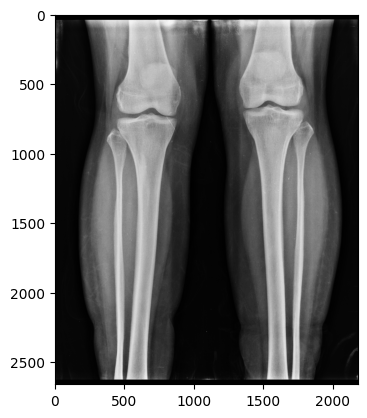

In [72]:
# Read the image
img = cv2.imread(pathList[160])  # Replace 'path/to/image.jpg' with the actual path to your image
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

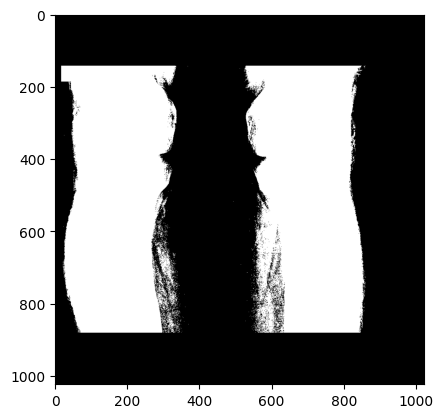

In [10]:

# Apply adaptive thresholding
thresh = cv2.threshold(img,100, 255, cv2.ADAPTIVE_THRESH_MEAN_C)[1]

# Display the thresholded image
plt.imshow(thresh, cmap='gray')



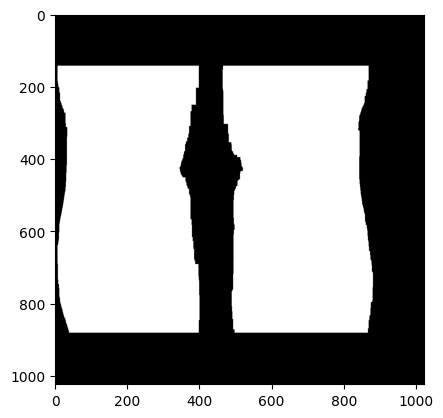

In [61]:
plt.imshow(apply_threshold(r'Osteoporosis Knee X-ray/normal/N1.JPEG',40, cv2.ADAPTIVE_THRESH_MEAN_C), cmap='gray')

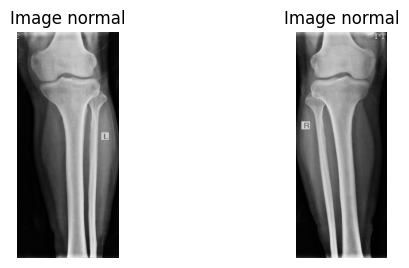

In [232]:
def apply_adaptive(image_path):
    # Read the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (244, 244))
    # Apply a binary threshold
    # _, thresholded = cv2.threshold(image, threshValue, 255, threshFunc)
    thresholded = cv2.adaptiveThreshold(image,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, \
            cv2.THRESH_BINARY_INV,41,10)
    return thresholded

def apply_threshold(image_path,threshValue,threshFunc):
    # Read the image

    originalImage = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    originalImage = cv2.resize(originalImage, (512,512))
    image = cv2.normalize(originalImage, None, alpha= 0, beta=255, norm_type=cv2.NORM_MINMAX, dtype= -1)
    dominant = findDominantColor(image)
    # return image
    # image = cv2.equalizeHist(image)
    # return image
    # Apply a binary threshold
    _, thresholded = cv2.threshold(image, dominant+10, 255, threshFunc)
    thresholded = cv2.erode(thresholded, None, iterations=25)
    thresholded = cv2.dilate(thresholded, None, iterations=25)
    # return thresholded
    boxes = findContour(thresholded)
    segments = []
    for x in boxes:
        x,y,w,h = x
        segments.append(originalImage[y:y+h, x:x+w])
    return segments

def findDominantColor(image):
    # Find the histogram of the image
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    # Find the most frequent color
    color = np.argmax(hist)
    return color

def findContour(image):
    # Find contours
    contours, _ = cv2.findContours(image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    # Draw contours
    image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    cv2.drawContours(image, contours, -1, (0, 255, 0), 3)

    boxes = []
    for i, contour in enumerate(contours):
        x, y, w, h = cv2.boundingRect(contour)
        # boxes = image[y:y+h, x:x+w]
        boxes.append((x,y,w,h))
        # cv2.imwrite(f'contour_{i}_{image_path.split("/")[-1]}', roi)
    return boxes

offset = 0 #10,20,150,200,210
# Apply threshold to the first 8 images
thresholded_images = [apply_threshold(path,40,cv2.THRESH_TOZERO) for path in pathList[offset:offset+8]]
# thresholded_images = [apply_adaptive(path) for path in pathList[offset:offset+8]]
# Plot the thresholded images
plt.figure(figsize=(10, 10))
for i, img in enumerate(thresholded_images[7]):
    plt.subplot(3, 3, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f'Image {pathList[offset+i].split("/")[1]}')
    plt.axis('off')

In [234]:
segCount = {}
import shutil
shutil.rmtree('segmentedImages')
os.mkdir("segmentedImages")
os.mkdir("segmentedImages/normal")
os.mkdir("segmentedImages/osteopenia")
os.mkdir("segmentedImages/osteoporosis")
for x in pathList:
    segmentedImages = apply_threshold(x,40, cv2.THRESH_TOZERO)
    print(x.split('/')[-1]+str(len(segmentedImages)))
    segCount[x.split('/')[-1]] = len(segmentedImages)
    path = f"segmentedImages/{x.split('/')[1]}/{x.split('/')[-1].strip('.JPEG').strip('.jpg')}"
    os.mkdir(path)
    cv2.imwrite(f"{path}/original.jpg", cv2.imread(x))
    for i, img in enumerate(segmentedImages):
        cv2.imwrite(f"{path}/{i}.jpg", img)

N1.JPEG2
N10.JPEG2
N11.JPEG2
N12.JPEG2
N13.jpg2
N14.jpg2
N15.jpg2
N16.jpg2
N17.jpg2
N18.jpg1
N19.jpg2
N2.JPEG1
N20.jpg2
N21.jpg2
N22.jpg1
N23.jpg2
N24.jpg1
N25.jpg1
N26.jpg1
N27.jpg1
N28.jpg1
N29.jpg1
N3.JPEG2
N30.jpg2
N31.jpg1
N32.jpg1
N33.jpg1
N34.jpg1
N35.jpg1
N36.jpg1
N4.JPEG2
N5.JPEG2
N6.JPEG3
N7.JPEG2
N8.JPEG2
N9.JPEG2
OP1.JPEG2
OP10.JPEG2
OP100.jpg2
OP101.jpg1
OP102.jpg1
OP103.jpg1
OP104.jpg1
OP105.jpg1
OP106.jpg1
OP107.jpg2
OP108.jpg1
OP109.jpg1
OP11.JPEG8
OP110.jpg1
OP111.jpg1
OP112.jpg2
OP113.jpg1
OP114.jpg1
OP115.jpg1
OP116.jpg1
OP117.jpg1
OP118.jpg1
OP119.jpg1
OP12.JPEG2
OP120.jpg1
OP121.jpg1
OP122.jpg2
OP123.jpg2
OP124.jpg1
OP125.jpg1
OP126.jpg1
OP127.jpg1
OP128.jpg1
OP129.jpg1
OP13.JPEG2
OP130.jpg1
OP131.jpg1
OP132.jpg1
OP133.jpg1
OP134.jpg1
OP135.jpg1
OP136.jpg1
OP137.jpg1
OP138.jpg1
OP139.jpg1
OP14.JPEG2
OP140.jpg1
OP141.jpg1
OP142.jpg1
OP143.jpg1
OP144.jpg1
OP145.jpg2
OP146.jpg1
OP147.jpg1
OP148.jpg1
OP149.jpg1
OP15.JPEG2
OP150.jpg1
OP151.jpg1
OP152.jpg1
OP153.jpg1
OP1

ValueError: num must be an integer with 1 <= num <= 9, not 10

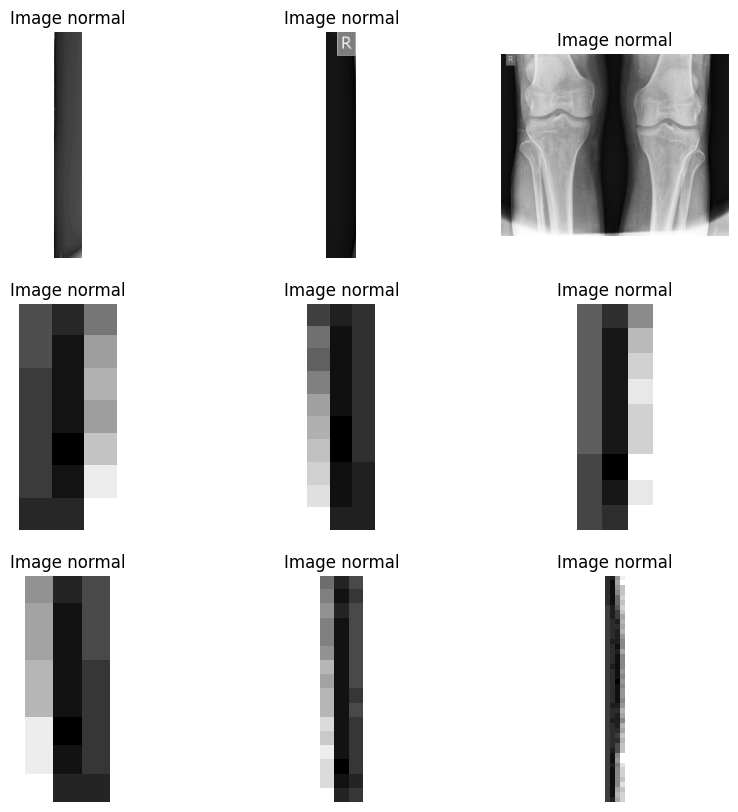

In [237]:

debug = apply_threshold(r"C:\Users\assaw\Documents\c_stuff\Python\machine learning\ISAIConference\Osteoporosis Knee X-ray\osteopenia\OP39.JPEG",40,cv2.THRESH_TOZERO)
# plt.imshow(debug)
# thresholded_images = [apply_adaptive(path) for path in pathList[offset:offset+8]]
# Plot the thresholded images
plt.figure(figsize=(10, 10))
for i, img in enumerate(debug):
    plt.subplot(3, 3, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f'Image {pathList[offset+i].split("/")[1]}')
    plt.axis('off')

In [244]:
uniques = {1, 2, 3, 6, 8, 14}
[list(segCount.values()).count(x) for x in uniques]

[95, 135, 6, 1, 1, 1]

In [245]:
[k for k,v in segCount.items() if float(v) >= 3]

['N6.JPEG',
 'OP11.JPEG',
 'OP16.JPEG',
 'OP38.JPEG',
 'OP39.JPEG',
 'OP60.jpg',
 'OP67.jpg',
 'OP76.jpg',
 'OP88.jpg']